In [1]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv(r"C:\Users\Mohhit\Desktop\CSV FILE\202104-divvy-tripdata.csv")
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337225,461A6B0728E063DB,classic_bike,2021-04-09 17:09:03,2021-04-09 17:16:16,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898587,-87.621915,41.896747,-87.635668,member
337226,CF1D3A35E3654F6F,docked_bike,2021-04-04 13:27:08,2021-04-04 14:41:11,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,casual
337227,4308ADB9171ACE49,classic_bike,2021-04-30 18:15:40,2021-04-30 19:12:44,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,member
337228,04DFB53077A17DA2,electric_bike,2021-04-18 11:40:37,2021-04-18 11:46:03,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898263,-87.622416,41.894942,-87.630438,member


In [21]:
df.shape

(298089, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337230 entries, 0 to 337229
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             337230 non-null  object 
 1   rideable_type       337230 non-null  object 
 2   started_at          337230 non-null  object 
 3   ended_at            337230 non-null  object 
 4   start_station_name  311174 non-null  object 
 5   start_station_id    311174 non-null  object 
 6   end_station_name    309056 non-null  object 
 7   end_station_id      309056 non-null  object 
 8   start_lat           337230 non-null  float64
 9   start_lng           337230 non-null  float64
 10  end_lat             336963 non-null  float64
 11  end_lng             336963 non-null  float64
 12  member_casual       337230 non-null  object 
dtypes: float64(4), object(9)
memory usage: 33.4+ MB


In [9]:
# Convert to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])


In [11]:
# Drop rows with missing location data
df.dropna(subset=['start_station_name', 'end_station_name'], inplace=True)

In [13]:
# Create new column for ride duration in minutes
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


In [15]:
# Filter out rides with negative or too long durations (e.g., >24 hours)
df = df[(df['ride_duration'] > 0) & (df['ride_duration'] <= 1440)]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298089 entries, 0 to 337229
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             298089 non-null  object        
 1   rideable_type       298089 non-null  object        
 2   started_at          298089 non-null  datetime64[ns]
 3   ended_at            298089 non-null  datetime64[ns]
 4   start_station_name  298089 non-null  object        
 5   start_station_id    298089 non-null  object        
 6   end_station_name    298089 non-null  object        
 7   end_station_id      298089 non-null  object        
 8   start_lat           298089 non-null  float64       
 9   start_lng           298089 non-null  float64       
 10  end_lat             298089 non-null  float64       
 11  end_lng             298089 non-null  float64       
 12  member_casual       298089 non-null  object        
 13  ride_duration       298089 non-nul

In [19]:
df.shape

(298089, 14)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

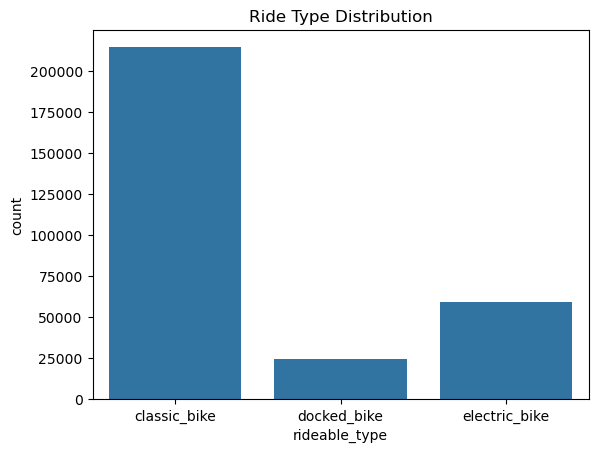

In [26]:
# Ride type distribution
sns.countplot(data=df, x='rideable_type')
plt.title("Ride Type Distribution")
plt.show()

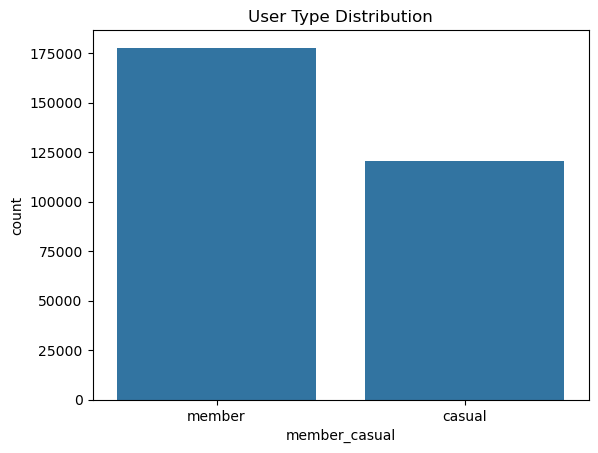

In [28]:
# Member vs Casual usage
sns.countplot(data=df, x='member_casual')
plt.title("User Type Distribution")
plt.show()


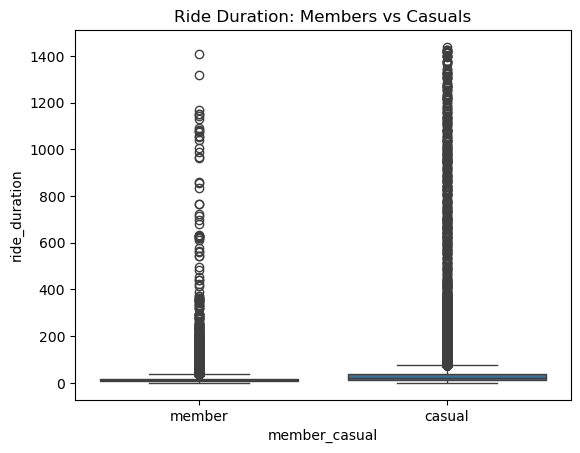

In [30]:
# Ride duration comparison
sns.boxplot(data=df, x='member_casual', y='ride_duration')
plt.title("Ride Duration: Members vs Casuals")
plt.show()

In [33]:
# Extract additional features
df['hour'] = df['started_at'].dt.hour
df['day_of_week'] = df['started_at'].dt.dayofweek


C:\Users\Mohhit\AppData\Local\Temp\ipykernel_16064\348480875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['started_at'].dt.hour
C:\Users\Mohhit\AppData\Local\Temp\ipykernel_16064\348480875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['started_at'].dt.dayofweek


In [35]:
# Select features and encode
X = df[['rideable_type', 'hour', 'day_of_week', 'ride_duration']]
X = pd.get_dummies(X, columns=['rideable_type'], drop_first=True)


In [37]:
# Target variable
y = df['member_casual'].map({'member': 0, 'casual': 1})

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [45]:
y_pred = model.predict(X_test)


In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6563789459559194
              precision    recall  f1-score   support

           0       0.71      0.73      0.72     35828
           1       0.57      0.54      0.56     23790

    accuracy                           0.66     59618
   macro avg       0.64      0.64      0.64     59618
weighted avg       0.65      0.66      0.65     59618



In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [3]:
# Load dataset
df=pd.read_csv(r"C:\Users\Mohhit\Desktop\CSV FILE\202104-divvy-tripdata.csv")
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337225,461A6B0728E063DB,classic_bike,2021-04-09 17:09:03,2021-04-09 17:16:16,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898587,-87.621915,41.896747,-87.635668,member
337226,CF1D3A35E3654F6F,docked_bike,2021-04-04 13:27:08,2021-04-04 14:41:11,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,casual
337227,4308ADB9171ACE49,classic_bike,2021-04-30 18:15:40,2021-04-30 19:12:44,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,member
337228,04DFB53077A17DA2,electric_bike,2021-04-18 11:40:37,2021-04-18 11:46:03,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898263,-87.622416,41.894942,-87.630438,member


In [5]:
# Convert datetime columns
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])


In [7]:
# Calculate ride duration in minutes
df["ride_length"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60


In [9]:
# Drop rows with missing values
df.dropna(subset=["start_station_name", "end_station_name", "end_lat", "end_lng"], inplace=True)

In [11]:
# Encode categorical variables
label_enc = LabelEncoder()
df["member_casual"] = label_enc.fit_transform(df["member_casual"])
df["rideable_type"] = label_enc.fit_transform(df["rideable_type"])

print(df.head())

            ride_id  rideable_type          started_at            ended_at  \
0  6C992BD37A98A63F              0 2021-04-12 18:25:36 2021-04-12 18:56:55   
1  1E0145613A209000              1 2021-04-27 17:27:11 2021-04-27 18:31:29   
2  E498E15508A80BAD              1 2021-04-03 12:42:45 2021-04-07 11:40:24   
3  1887262AD101C604              0 2021-04-17 09:17:42 2021-04-17 09:42:48   
4  C123548CAB2A32A5              1 2021-04-03 12:42:25 2021-04-03 14:13:42   

         start_station_name start_station_id              end_station_name  \
0     State St & Pearson St     TA1307000061  Southport Ave & Waveland Ave   
1  Dorchester Ave & 49th St     KA1503000069      Dorchester Ave & 49th St   
2     Loomis Blvd & 84th St            20121         Loomis Blvd & 84th St   
3   Honore St & Division St     TA1305000034  Southport Ave & Waveland Ave   
4     Loomis Blvd & 84th St            20121         Loomis Blvd & 84th St   

  end_station_id  start_lat  start_lng    end_lat    end_lng  

In [13]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,6C992BD37A98A63F,0,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,1,31.316667
1,1E0145613A209000,1,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,0,64.300000
2,E498E15508A80BAD,1,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,0,5697.650000
3,1887262AD101C604,0,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,1,25.100000
4,C123548CAB2A32A5,1,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,0,91.283333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337225,461A6B0728E063DB,0,2021-04-09 17:09:03,2021-04-09 17:16:16,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898587,-87.621915,41.896747,-87.635668,1,7.216667
337226,CF1D3A35E3654F6F,1,2021-04-04 13:27:08,2021-04-04 14:41:11,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,0,74.050000
337227,4308ADB9171ACE49,0,2021-04-30 18:15:40,2021-04-30 19:12:44,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,1,57.066667
337228,04DFB53077A17DA2,2,2021-04-18 11:40:37,2021-04-18 11:46:03,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898263,-87.622416,41.894942,-87.630438,1,5.433333


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


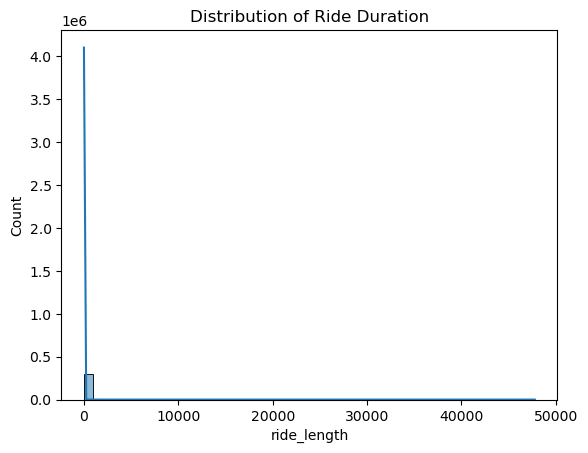

In [17]:
# Ride length distribution
sns.histplot(df["ride_length"], bins=50, kde=True)
plt.title("Distribution of Ride Duration")
plt.show()

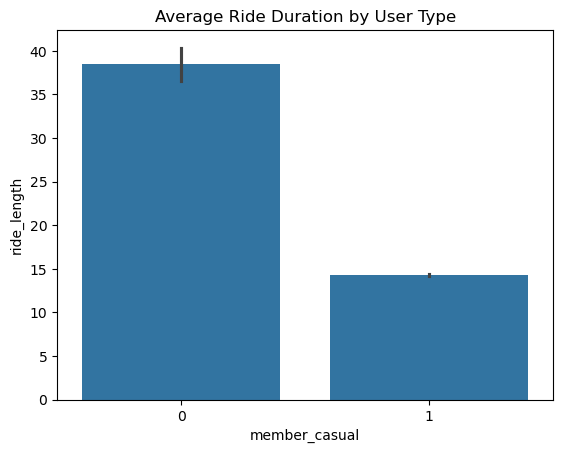

In [19]:
# Avg ride length per user type
sns.barplot(x=df["member_casual"], y=df["ride_length"])
plt.title("Average Ride Duration by User Type")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Select features
X = df[["rideable_type", "start_lat", "start_lng", "end_lat", "end_lng", "ride_length"]]
y = df["member_casual"]


In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier()

In [28]:
# Predictions
y_pred = model.predict(X_test)


In [29]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7496395157774722
              precision    recall  f1-score   support

           0       0.71      0.63      0.67     23960
           1       0.77      0.83      0.80     35682

    accuracy                           0.75     59642
   macro avg       0.74      0.73      0.73     59642
weighted avg       0.75      0.75      0.75     59642



In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [87]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10]  
}

In [89]:
# Initialize model
rf = RandomForestClassifier()


In [ ]:
# Use GridSearchCV for tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


In [33]:
from sklearn.cluster import KMeans

In [35]:
# Select location features
station_data = df[['start_lat', 'start_lng']].dropna()


In [37]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
station_data['cluster'] = kmeans.fit_predict(station_data)


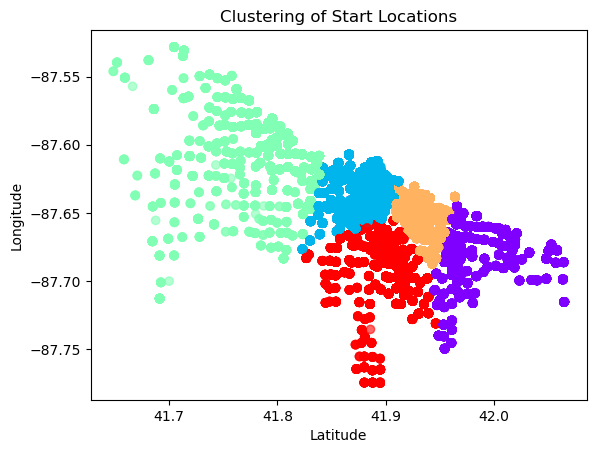

In [39]:
# Visualize clusters
import matplotlib.pyplot as plt

plt.scatter(station_data['start_lat'], station_data['start_lng'], c=station_data['cluster'], cmap='rainbow', alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering of Start Locations')
plt.show()

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
# Extract hour from 'started_at'
df["hour"] = df["started_at"].dt.hour


In [45]:
# Group rides by hour
hourly_rides = df.groupby("hour")["ride_id"].count()


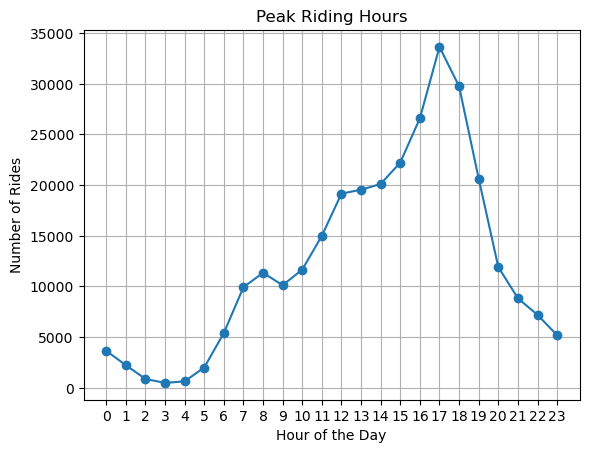

In [47]:
# Plot peak hours
plt.plot(hourly_rides.index, hourly_rides.values, marker='o', linestyle='-')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Peak Riding Hours")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

In [49]:
# Extract weekday info
df["weekday"] = df["started_at"].dt.weekday


In [51]:
# Mark weekends (Saturday=5, Sunday=6)
df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)


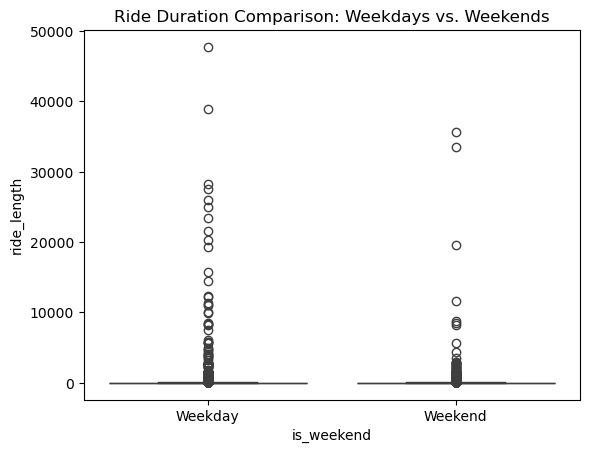

In [53]:
# Compare ride length between weekdays and weekends
import seaborn as sns

sns.boxplot(x=df["is_weekend"], y=df["ride_length"])
plt.xticks([0, 1], ["Weekday", "Weekend"])
plt.title("Ride Duration Comparison: Weekdays vs. Weekends")
plt.show()